- - - -
# Mechpy
a mechanical engineer's toolbox   

To view this notebook, use the [nbviewer](http://nbviewer.jupyter.org/github/nagordon/mechpy/blob/master/mechpy/examplse/mechpy.ipynb)
- - - -


## Python Initilaization with module imports

In [4]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: Qt4Agg


# Materials
[index](#Mechpy)

## Stress and Strain
Stress is a tensor that can be broken into 

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$




# Stress Transformations
[index](#Mechpy)  

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$

reduce to plane stress

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & 0 \\
 \sigma_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$

or

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \tau_{xy} & 0 \\
 \tau_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$


$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{x} & \sigma_{xy} \\
 \sigma_{yx} & \sigma_{y} \\
 \end{bmatrix} 
$$

Transformation

$$
A=\begin{bmatrix}
 cos(\theta) & sin(\theta) \\
 -sin(\theta) & cos(\theta) \\
 \end{bmatrix} 
$$

$$
\sigma'=A \sigma A^T
$$


$$
\sigma_1 , \sigma_2 = \frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}
$$


$$
T=\left[\begin{matrix}\sin^{2}{\left (\theta \right )} & \cos^{2}{\left (\theta \right )} & 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\cos^{2}{\left (\theta \right )} & \\
\sin^{2}{\left (\theta \right )} & - 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\- \sin{\left (\theta \right )} \cos{\left (\theta \right )} & \\
\sin{\left (\theta \right )} \cos{\left (\theta \right )} & \sin^{2}{\left (\theta \right )} - \cos^{2}{\left (\theta \right )}\end{matrix}\right]
$$

In [3]:
import sympy as sp
from sympy.abc import tau, sigma
import numpy as np
sp.init_printing()

\frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}


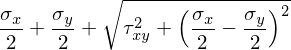

In [4]:
sx,sy,txy,tp = sp.symbols('sigma_x,sigma_y,tau_xy,theta_p')
sp1 = (sx+sy)/2 + sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
sp2 = (sx+sy)/2 - sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
print(sp.latex(sp1))
sp1

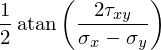

In [5]:
tp = sp.atan(2*txy/(sx-sy) )/2
tp

In [6]:
tpp = tp.evalf(subs={sx:10,sy:15,txy:10})
tpp

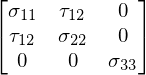

In [7]:
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13,t,t12 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13,tau,tau12')
s = sp.Matrix([[s11,t12,0],[t12,s22,0],[0,0,s33]])
s

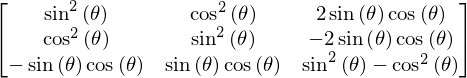

In [8]:
t = sp.symbols('theta')
m = sp.sin(t)
n = sp.cos(t)
T = sp.Matrix([[m**2,n**2, 2*m*n],[n**2,m**2,-2*m*n],[-m*n,m*n,m**2-n**2]])
T

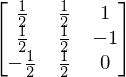

In [9]:
T1 = T.subs(t, sp.pi/4)
T1

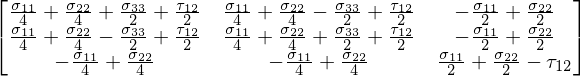

In [10]:
sprime = T1 * s * T1.inv()
sprime

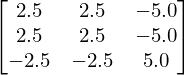

In [11]:
sprime.evalf(subs={s11:10, s22:00, s33:0, t12:0})

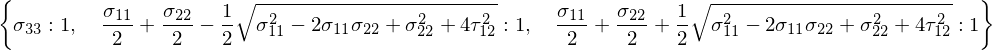

In [12]:
s.eigenvals() 

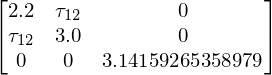

In [13]:
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

In [14]:
sigma = np.array([[90,60],
                  [60,-20]])
np.linalg.eigvals(sigma)

array([ 116.39410298,  -46.39410298])

In [15]:
# PLane Stress

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy,0],
                  [tauxy,   sigmay,0],
                 [0,0,0]])

sigmap = np.linalg.eig(sigma)[0]
print(sigmap)

thetap = np.linalg.eig(sigma)[1]  # degrees

print('cosine angle')
print(thetap )  # cosine angle

print('plane angle')
print(np.arccos(thetap)*180/np.pi)

[ 1. -1.  0.]
cosine angle
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
plane angle
[[  45.  135.   90.]
 [  45.   45.   90.]
 [  90.   90.    0.]]


In [16]:
# maximum in-plane shear stress
eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

45.0


In [17]:
tauxy = 0    # lbs/in 
sigmax = 100   # lbs/in
sigmay = np.linspace(0,1.100)   # lbs/in

eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

# sigmax = 100
# sigmay = np.linspace(0,1.100)
# tauxy = 0
# tparray = sp.atan(2*tauxy/(sigmax-sigmay) )/2
# tparray

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [25]:
sigma

array([[0, 1, 0],
       [1, 0, 0]])

In [26]:
th = np.pi/4  # 45 deg
m = np.cos(th)
n = np.sin(th)
A = np.array([ [m,n],[-n,m]])

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy],
                  [tauxy,   sigmay]])

sigmat = A @ sigma @ A.T  # transformed stress
sigmat

array([[ 1.,  0.],
       [ 0., -1.]])

In [27]:
sigmap = np.linalg.eig(sigmat)[0]  # principal stresses
print(sigmap)

thetap = np.linalg.eig(sigmat)[1]  # principal planes
print(thetap* 180/np.pi)

[ 1. -1.]
[[ 57.29577951   0.        ]
 [  0.          57.29577951]]


In [1]:
from ipywidgets import IntSlider
IntSlider()

In [2]:
# Principal Stresses

sx  = 63.66
sy  = 0
sz  = 0
txy = 63.66
txz = 0
tyz = 0

S = np.matrix([[sx, txy, txz],
            [txy, sy, tyz],
            [txy, txz, sz]])

print(S)

NameError: name 'np' is not defined

In [130]:
principal_stresses = np.linalg.eigvals(S)
print(principal_stresses)

[   0.          -39.34404372  103.00404372]


In [132]:
import sympy as sp
from sympy.abc import tau, sigma
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13')
s = sp.Matrix([[s11,s12,0],[s12,s22,0],[0,0,s33]])
s

⎡σ₁₁  σ₁₂   0 ⎤
⎢             ⎥
⎢σ₁₂  σ₂₂   0 ⎥
⎢             ⎥
⎣ 0    0   σ₃₃⎦

In [133]:
s**2

⎡      2      2                            ⎤
⎢   σ₁₁  + σ₁₂      σ₁₁⋅σ₁₂ + σ₁₂⋅σ₂₂   0  ⎥
⎢                                          ⎥
⎢                         2      2         ⎥
⎢σ₁₁⋅σ₁₂ + σ₁₂⋅σ₂₂     σ₁₂  + σ₂₂       0  ⎥
⎢                                          ⎥
⎢                                         2⎥
⎣        0                  0          σ₃₃ ⎦

In [134]:
s.eigenvals()  # hmm looks familiar

⎧                       __________________________________                    
⎪                      ╱    2                    2      2                    ╱
⎨        σ₁₁   σ₂₂   ╲╱  σ₁₁  - 2⋅σ₁₁⋅σ₂₂ + 4⋅σ₁₂  + σ₂₂       σ₁₁   σ₂₂   ╲╱ 
⎪σ₃₃: 1, ─── + ─── - ─────────────────────────────────────: 1, ─── + ─── + ───
⎩         2     2                      2                        2     2       

__________________________________   ⎫
    2                    2      2    ⎪
 σ₁₁  - 2⋅σ₁₁⋅σ₂₂ + 4⋅σ₁₂  + σ₂₂     ⎬
──────────────────────────────────: 1⎪
               2                     ⎭

In [138]:
s1 = s.subs(s11,2.2).subs(s22,3).subs(s33,sp.pi).subs(s12,7.3)
s1

⎡2.2  7.3  0⎤
⎢           ⎥
⎢7.3   3   0⎥
⎢           ⎥
⎣ 0    0   π⎦

In [140]:
# or 
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

⎡2.2  7.3         0        ⎤
⎢                          ⎥
⎢7.3  3.0         0        ⎥
⎢                          ⎥
⎣ 0    0   3.14159265358979⎦

In [142]:
s1.eigenvals()

⎧             ______         ______        ⎫
⎪      13   ╲╱ 5345        ╲╱ 5345    13   ⎪
⎨π: 1, ── + ────────: 1, - ──────── + ──: 1⎬
⎪      5       10             10      5    ⎪
⎩                                          ⎭

In [143]:
s2.eigenvals()

⎧                           ______         ______        ⎫
⎪314159265358979     13   ╲╱ 5345        ╲╱ 5345    13   ⎪
⎨───────────────: 1, ── + ────────: 1, - ──────── + ──: 1⎬
⎪100000000000000     5       10             10      5    ⎪
⎩                                                        ⎭

In [144]:
s2.inv()

⎡-0.0642535874919684   0.156350396230456           0        ⎤
⎢                                                           ⎥
⎢ 0.156350396230456   -0.0471192974941101          0        ⎥
⎢                                                           ⎥
⎣         0                    0           0.318309886183791⎦

In [1]:
C = sp.symbols('C1:100')
C

NameError: name 'sp' is not defined